<a href="https://colab.research.google.com/github/ardayekh/ProfessionalDataEngineer/blob/main/Building_Resilient_Streaming_Analytics_Systems_on_GCP_Week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font color="red">**--------------------[Week2 - Day1]--------------------**

**Streaming into BigQuery and Visualizing Results**

- USE STREAMING INSRTION WHEN REAL TIME DATA IS NEEDED BY APPLICATION BUT USE BATCH LOADING WHEREEVER POSSIBLE AS IT IS FREE UNLIKE STREAMING INSERTION
- DATA IS MADE AVAILABLE FOR INSERTION IN SECONDS AS IT GETS BUFFERED AFTER ENTERING SYSTEM

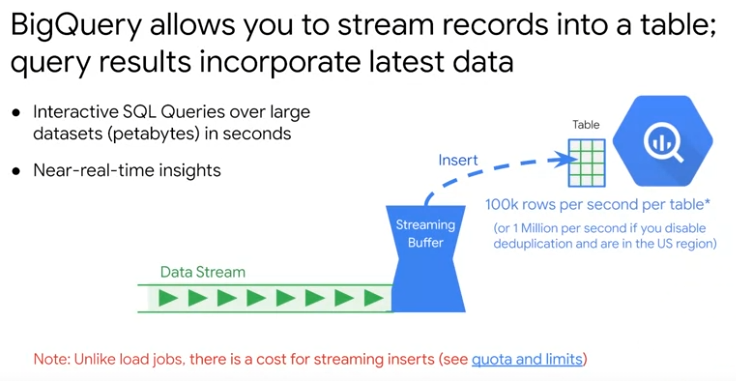


- INSERTING STREAMING DATA INTO A BIGQUERY TABLE

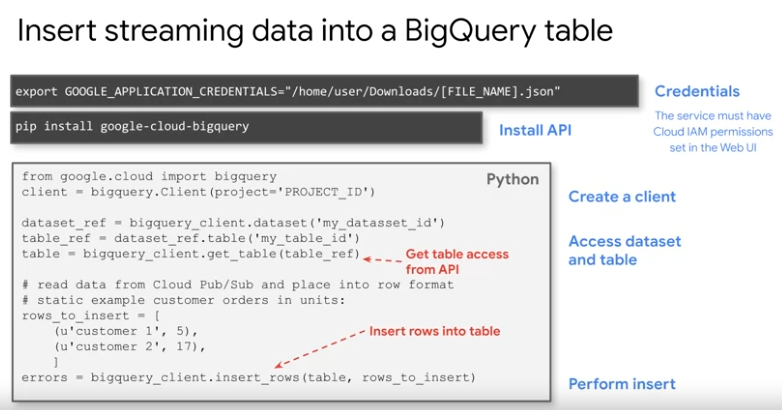

**High-Throughput Streaming with Cloud Bigtable**

- In BigQuery, the data that's streaming in is available in a matter of seconds, and sometimes you will want lower latency than that.

- sometimes you will want lower latency than that. You will want your information to be available in a matter of milliseconds, for example, or microseconds. 

- Bigtable handles high throughput data and at low latency and can be used for high performance applications

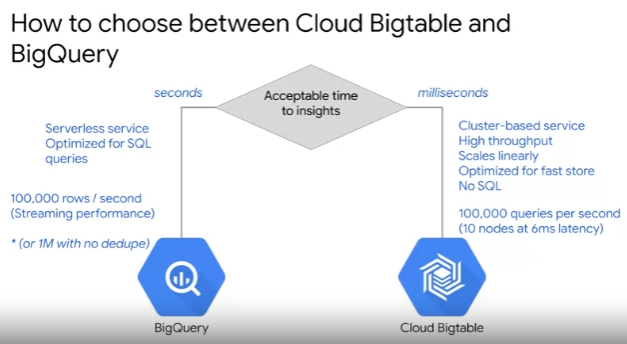

- Below are some considerations about when to/not to use Cloud Bigtable

- To use Cloud Bigtable effectively, you have to know a lot about your data and how it will be queried upfront. A lot of optimizations happen before you load data into Cloud Bigtable. Cloud Bigtable is ideal for applications that need very high throughput and scalability for non-structured key-value data, where each value is typically no larger than 10 megabytes.

- Not good for highly structured data, transaction data, small data, less than one terabytes and anything requiring SQL queries and SQL-like joins.

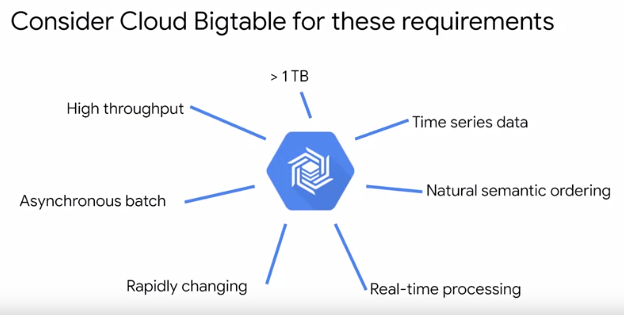


- Cloud Bigtable stores data in a file system called colossus. Colossus also contains data structures like tablets that are used to identify and manage the data, and metadata about the tablets is what it is stored on the VMs in Bigtable cluster itself.

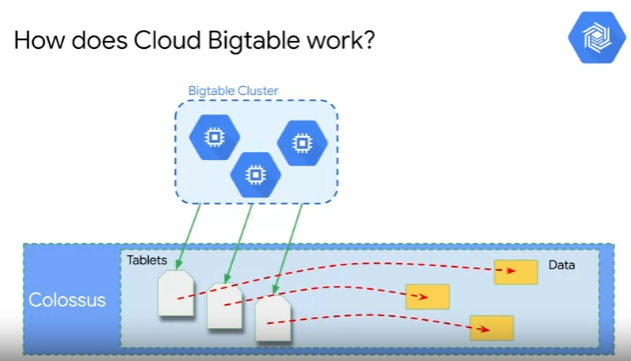

- Cloud Bigtable is a learning system. It detects hotspots, where a lot of activity is going through a single tablet and splits the table into two. It can also rebalance the processing by moving the pointer to a tablet to a different VM in the cluster. So it's best used cases with Big Data above 300 gigs and very fast access, but constant use over a longer period of time. This gives Cloud Bigtable a chance to learn about the traffic pattern and rebalance the tablets and the processing. 

- Bigtable is a cluster-based implementation, that means there are multiple machines which host Bigtable service and offer processing capabilities.

- If one of the machines (nodes) fail, the processing won't be affected and data won't be lost as Bigtable is a managed service and a=is fault tolerant

- In case of a node's failure, only pointers to the actual data will be lost. Actual data will be available in colossus. So a new replacement node will come up and it will be provided with a fresh copy of pointers or metadata which was handled by faulty node.

- Colossus maintains three replicas by default to provide durability.



**How is data stored in Bigtable**

- To begin with, it is just a table with rows and columns. However, unlike other table-based data systems like spreadsheets or SQL databases, Cloud Bigtable has only one index, that index is called as row key. There are no alternate indexes or secondary indexes, and when data is entered, it is organized lexicographically by the row key.

- In Cloud Bigtable, the first thing we must abandon in our design is SQL, that is a standard of all the operations are database can perform. To speed things up, we will drop most of them and build up from a minimal set of operations. That is why Cloud Bigtable is called a NoSQL database.


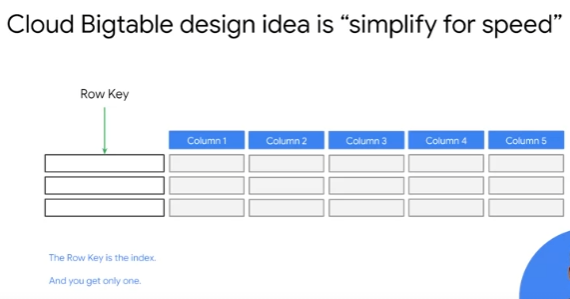

- to get the best performance with the design of the Cloud Bigtable service, you need to get your data in order first, if possible, and you need to select or construct a Row Key that minimizes sorting, and searching, and turns your most common queries into scans.

- Below is an exmaple of world flight data by capturing data baout the airplane, its capacity and orgin and destination

- in the first two example, independent columns are used as row index while in the third example an additinal column is constrcuted to combine the origin and arrival data as row index. this allows all the flight orignation from the same airport to be grouped together and sorted by arrival date which can increase performance of most used query which in this case is: "all flights originating from a particualr airport and filetered on arrival date"

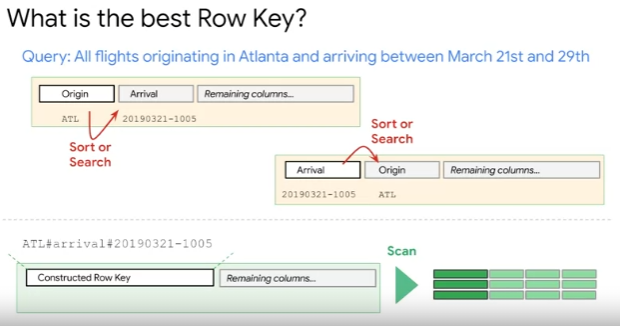

- Cloud Bigtable also provide column families. By accessing the column family, you can pull some of the data you need without pulling all of the data from the row, or having to search for it and assembling. This makes access more efficient.

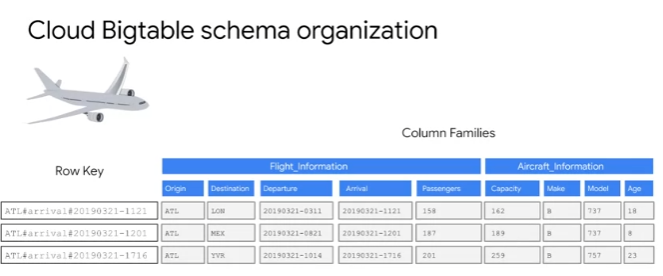